<a href="https://colab.research.google.com/github/hyag1/datateste/blob/main/Churning_Banco_aprendizagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#importando arquivos do github
url = "https://raw.githubusercontent.com/hyag1/datateste/main/Churn_Modelling.csv"
df = pd.read_csv(url)
df.head(10)

In [ ]:
df.describe()#descreve as variasveis(colunas)

In [ ]:
df.hist(figsize=(12,10));

In [ ]:
df['Exited_cat']=df['Exited'].replace([0,1],['Não','Sim'])
x_cont=['CreditScore','Balance','Age','EstimatedSalary','Tenure','NumOfProducts']

In [ ]:
df_cont = df[['Age', 'Balance', 'Tenure','NumOfProducts','EstimatedSalary']]
df_cont

In [ ]:
#plot variaveis numericas
fig, ax = plt.subplots( 1, 6, figsize=(22,6));
df[df.Exited_cat == "Não"][x_cont].hist(bins = 30, color = "blue", alpha = 0.5, ax=ax)
df[df.Exited_cat == "Sim"][x_cont].hist(bins = 30, color = "red", alpha = 0.5, ax=ax)

In [ ]:
#plot relação genero com saida do banco
df_plot = df.groupby('Gender').Exited.mean().reset_index()
df_plot

In [ ]:
#plot relação pais com saida do banco
df_plot1 = df.groupby('Geography').Exited.mean().reset_index()
df_plot1

In [ ]:
#grafico do plot da relação do pais com a taxa de church
cols = ['red','blue','green']
x = df_plot1['Geography']
y = df_plot1['Exited']
plt.bar(x,y,color=cols)
plt.title('Taxa de Churn por Local')
plt.xlabel('Local')
plt.ylabel('Taxa de Churn')

In [ ]:
#importando bibliotecas do python
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df['Exited'].sum()/df['Exited'].count() #porcentagem de clientes q sairam do banco

In [ ]:
df['Exited']=df['Exited'].replace([0,1],['Não','Sim'])
sns.countplot(data=df,x='Exited')

In [ ]:
#grafico do plot entre genero e taxa de church
cols = ['red','blue']
x = df_plot['Gender']
y = df_plot['Exited']
plt.bar(x,y,color=cols)
plt.title('Taxa de Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Taxa de Churn')

In [ ]:
#matriz de correlação, alta correlação indica que as variaveis estão indo pra o mesmo sentido, provavelmente não ira precisar das duas no mesmo modelo
#ira prejudicar na parte de precisão de estimação do modelo
#exemplo quanto maior o salario menor o numero de produtos q ela possue
sns.heatmap(df_cont.corr(),annot= True, cmap = 'Blues')

In [ ]:
df_plot2 = df.groupby('NumOfProducts').Exited.mean().reset_index()
df_plot2

In [ ]:
cols = ['red','blue','green','orange']
x = df_plot2['NumOfProducts']
y = df_plot2['Exited']
plt.bar(x,y,color=cols)
plt.title('Taxa de Churn por Numero de Produtos')
plt.xlabel('Numero de Produtos')
plt.ylabel('Taxa de Churn')

In [ ]:
#boxplot salto bancanrio com relação ao churning
df['Exited']=df['Exited'].replace([0,1],['Não','Sim'])
sns.boxplot(x='Exited', y = 'Balance', data = df)
plt.title("Box Plot da variavel saldo bancario")
plt.xlabel('Variavel Churn')
plt.ylabel('Saldo Bancario')
df.groupby(['Exited'])['Balance'].mean()

Text(0, 0.5, 'churn')

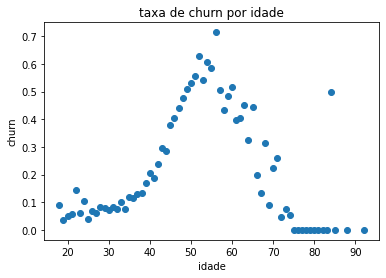

In [ ]:
#grafico de dispersão 
df_plot3 = df.groupby('Age').Exited.mean().reset_index()
#idade por churn grafico de dispersão
x = df_plot3['Age']
y = df_plot3['Exited']
plt.scatter(x,y)
plt.title("taxa de churn por idade")
plt.xlabel("idade")
plt.ylabel("churn")